#Image Classification with SIFT Feature and Neural Networks

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import SIFT
from sklearn.neural_network import MLPClassifier

from PIL import Image
from skimage import exposure


## 1. Dataset Preparation

mount google drive

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Extract data

In [8]:
!unzip /content/drive/MyDrive/Al.zip 

Streaming output truncated to the last 5000 lines.
  inflating: Al/face-detection/venv/Lib/site-packages/numpy/core/tests/data/umath-validation-set-tan.csv  
  inflating: __MACOSX/Al/face-detection/venv/Lib/site-packages/numpy/core/tests/data/._umath-validation-set-tan.csv  
  inflating: Al/face-detection/venv/Lib/site-packages/numpy/core/tests/data/umath-validation-set-exp.csv  
  inflating: __MACOSX/Al/face-detection/venv/Lib/site-packages/numpy/core/tests/data/._umath-validation-set-exp.csv  
  inflating: Al/face-detection/venv/Lib/site-packages/numpy/core/tests/data/astype_copy.pkl  
  inflating: __MACOSX/Al/face-detection/venv/Lib/site-packages/numpy/core/tests/data/._astype_copy.pkl  
  inflating: Al/face-detection/venv/Lib/site-packages/numpy/core/lib/npy-pkg-config/npymath.ini  
  inflating: __MACOSX/Al/face-detection/venv/Lib/site-packages/numpy/core/lib/npy-pkg-config/._npymath.ini  
  inflating: Al/face-detection/venv/Lib/site-packages/numpy/core/lib/npy-pkg-config/mlib.ini 



```
# This is formatted as code
```

## Load Image Data

In [9]:
image_dir = '/content/Al/face-detection/'

# Get all .jpg & .png images in the male folder
male_filenames = [os.path.join(image_dir, 'images/gender/male', filename) for filename in os.listdir(image_dir + 'images/gender/male') if filename.endswith('.jpg') or filename.endswith('.png')]

# Get all .jpg & .png images in the female folder
female_filenames = [os.path.join(image_dir, 'images/gender/female', filename) for filename in os.listdir(image_dir + 'images/gender/female') if filename.endswith('.jpg') or filename.endswith('.png')]

# Get the images using the file names
male_images = [Image.open(filename) for filename in male_filenames]
female_images = [Image.open(filename) for filename in female_filenames]

In [10]:
# make labels
female_labels = [0 for i in range(len(female_images))]
male_labels = [1 for i in range(len(male_images))]

show image

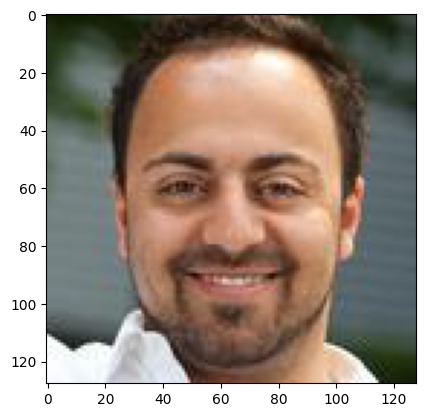

In [11]:
plt.imshow(male_images[1], cmap='gray')

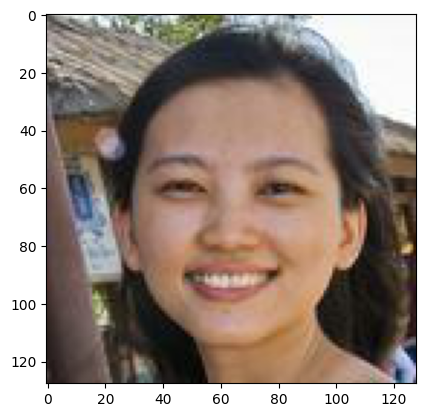

In [12]:
plt.imshow(female_images[1], cmap='gray')

## Test extract SIFT feature from image

In [13]:
# Extract the SIFT descriptor
descriptor_extractor = SIFT()

# Extract the SIFT descriptor from the image
descriptor_extractor.detect_and_extract(male_images[0].convert('L'))
image_keypoints   = descriptor_extractor.keypoints
image_descriptors = descriptor_extractor.descriptors
image_keypoints.shape, image_descriptors.shape

((156, 2), (156, 128))

In [14]:
np.array(image_descriptors[:20, :]).flatten().shape

(2560,)


## 2. Preprocessing using SIFT Feature Extraction

In [15]:
# merge images
images = male_images + female_images
labels = male_labels + female_labels

In [16]:
number_of_keypoint = 100
# n_dims = number_of_keypoint * image_descriptors.shape[1]
n_dims = np.array(image_descriptors[:20, :]).flatten().shape[0]

In [17]:
n_samples = len(images)
n_samples

10000



Create variable for dataset

In [18]:
from sklearn import datasets

In [19]:
X, y = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [20]:
X.shape

(10000, 2560)

In [21]:
X

array([[ 0.88144331, -0.95615727,  0.97282485, ...,  0.85317209,
        -0.11872519, -2.30861633],
       [-0.3172524 ,  0.48499868, -0.39605043, ..., -0.8047177 ,
        -0.50910142,  0.20776239],
       [-0.44599323,  1.12739191,  0.07431566, ..., -0.98082063,
         1.64884422, -1.25885608],
       ...,
       [ 0.36342686,  0.22594878,  2.27460901, ...,  0.78489858,
        -0.90271445,  0.42345131],
       [-0.60328328,  0.47462236, -1.13031304, ..., -0.04406658,
        -0.08031089,  0.60022876],
       [ 1.3377558 ,  1.9308917 ,  0.71827775, ...,  0.4839401 ,
        -0.49826441, -1.27225648]])

# New section


**Get SIFT feature from each image & put into dataset variable**

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=n_dims)

In [23]:
from tqdm import tqdm
for i in tqdm(range(n_samples)):
  
  # Extract the SIFT descriptor from the image
  descriptor_extractor.detect_and_extract(images[i].convert('L'))
  image_descriptors = descriptor_extractor.descriptors[:20, :]
  X[i] = np.array(image_descriptors[:20, :]).flatten()
  y[i] = labels[i]

100%|██████████| 10000/10000 [32:45<00:00,  5.09it/s]


Train-Test split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [26]:
print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Train shape: (8000, 2560)
Test shape: (2000, 2560)


In [27]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, precision_recall_curve
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import KFold

from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings("ignore")


In [28]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, auc

In [29]:
def train(clf, X_train, y_train):
    clf.fit(X_train, y_train)
    return clf 

In [30]:
def test(model_name, clf, X_train, y_train, X_test, y_test):
    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    
    cm_test = confusion_matrix(y_pred, y_test)
    
    print(f'Accuracy for training set for {model_name} = {accuracy_score(y_train, y_pred_train)}\n')
    print(f'Accuracy for test set for {model_name} = {accuracy_score(y_test, y_pred)}')
    print(f'Precision for test set for {model_name} = {precision_score(y_test, y_pred)}')
    print(f'Recall for test set for {model_name} = {recall_score(y_test, y_pred)}')
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    plt.plot(recall, precision)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.grid(False)
#     plt.plot(auc(y_test, y_pred))
    
    # Plot non-normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
        plt.grid(False)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)


GaussianNB

Train score of trained model: 64.14999999999999
Test score of trained model: 60.050000000000004
 
Accuracy : 0.6005
Precision: 0.6219758064516129
Recall   : 0.5926993275696446
F1 score : 0.6069847515986229
Specificity : 0.6089676746611054

Classification Report: 
              precision    recall  f1-score   support

           0       0.58      0.61      0.59       959
           1       0.62      0.59      0.61      1041

    accuracy                           0.60      2000
   macro avg       0.60      0.60      0.60      2000
weighted avg       0.60      0.60      0.60      2000





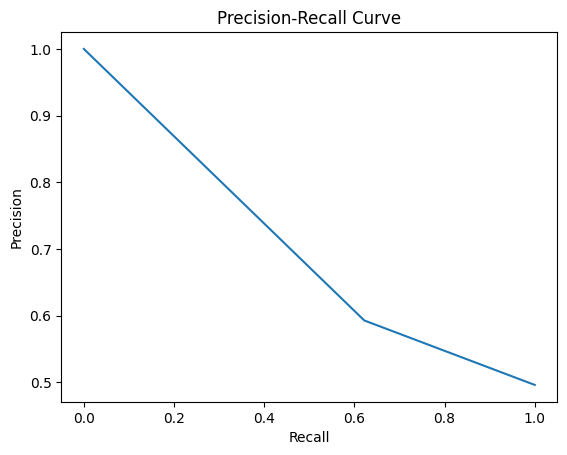

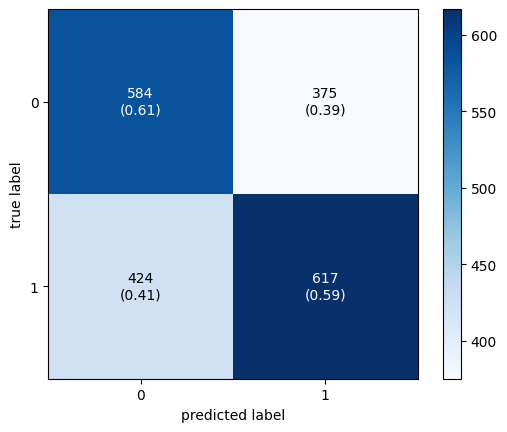

############################################################################




BernoulliNB

Train score of trained model: 60.724999999999994
Test score of trained model: 57.45
 
Accuracy : 0.5745
Precision: 0.5604838709677419
Recall   : 0.572605561277034
F1 score : 0.5664798777381558
Specificity : 0.576287657920311

Classification Report: 
              precision    recall  f1-score   support

           0       0.59      0.58      0.58      1029
           1       0.56      0.57      0.57       971

    accuracy                           0.57      2000
   macro avg       0.57      0.57      0.57      2000
weighted avg       0.57      0.57      0.57      2000





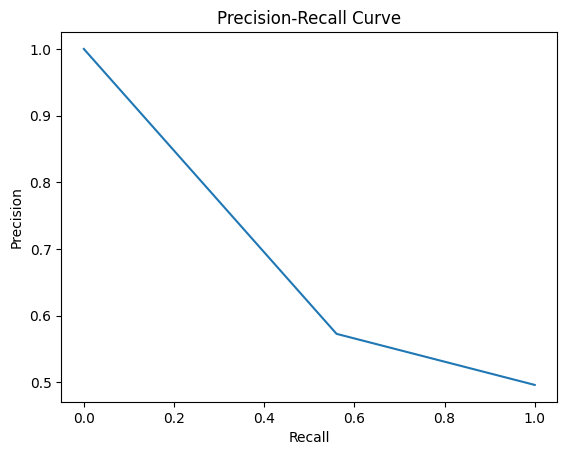

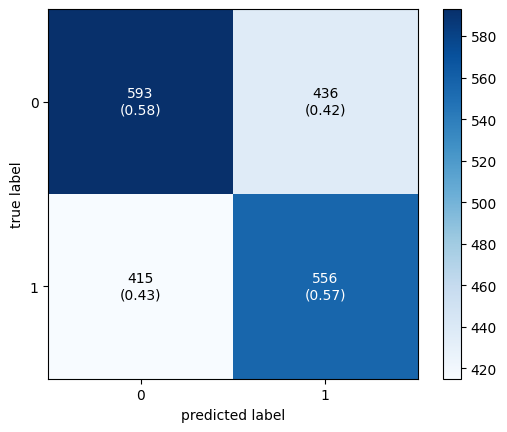

############################################################################




LinearDiscriminantAnalysis

Train score of trained model: 80.975
Test score of trained model: 60.0
 
Accuracy : 0.6
Precision: 0.6008064516129032
Recall   : 0.596
F1 score : 0.5983935742971889
Specificity : 0.604

Classification Report: 
              precision    recall  f1-score   support

           0       0.60      0.60      0.60      1000
           1       0.60      0.60      0.60      1000

    accuracy                           0.60      2000
   macro avg       0.60      0.60      0.60      2000
weighted avg       0.60      0.60      0.60      2000





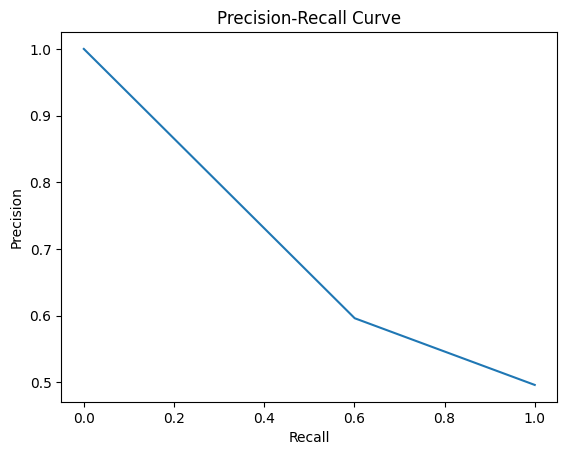

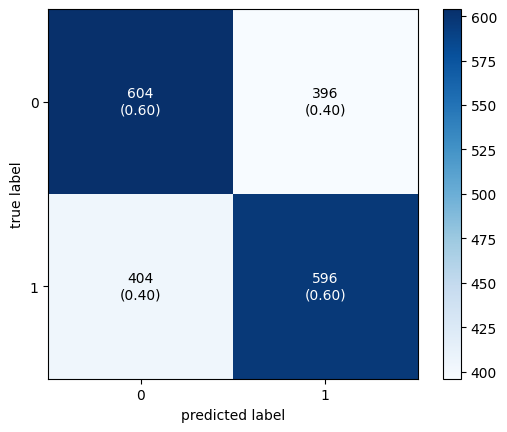

############################################################################




LogisticRegression

Train score of trained model: 81.1125
Test score of trained model: 60.099999999999994
 
Accuracy : 0.601
Precision: 0.59375
Recall   : 0.5985772357723578
F1 score : 0.5961538461538463
Specificity : 0.6033464566929134

Classification Report: 
              precision    recall  f1-score   support

           0       0.61      0.60      0.61      1016
           1       0.59      0.60      0.60       984

    accuracy                           0.60      2000
   macro avg       0.60      0.60      0.60      2000
weighted avg       0.60      0.60      0.60      2000





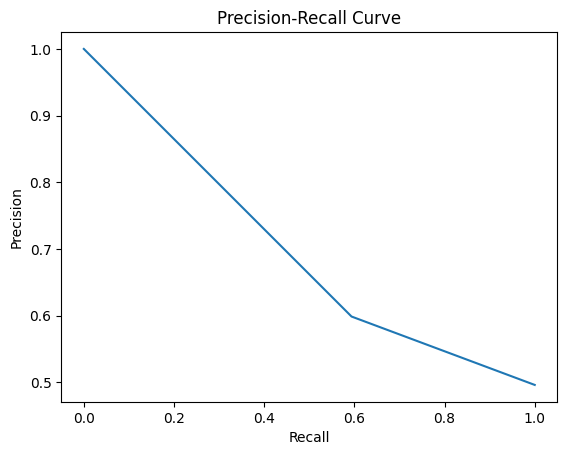

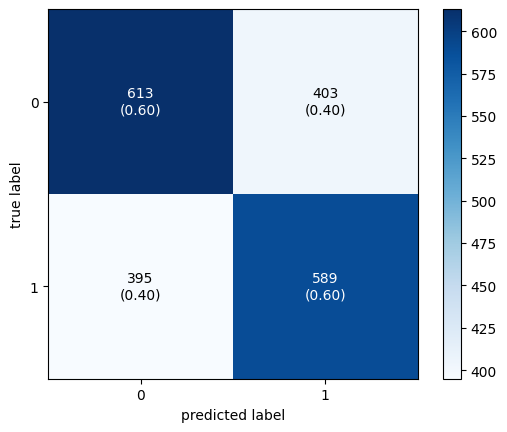

############################################################################




RandomForestClassifier

Train score of trained model: 100.0
Test score of trained model: 58.3
 
Accuracy : 0.583
Precision: 0.5463709677419355
Recall   : 0.5853131749460043
F1 score : 0.5651720542231491
Specificity : 0.5810055865921788

Classification Report: 
              precision    recall  f1-score   support

           0       0.62      0.58      0.60      1074
           1       0.55      0.59      0.57       926

    accuracy                           0.58      2000
   macro avg       0.58      0.58      0.58      2000
weighted avg       0.59      0.58      0.58      2000





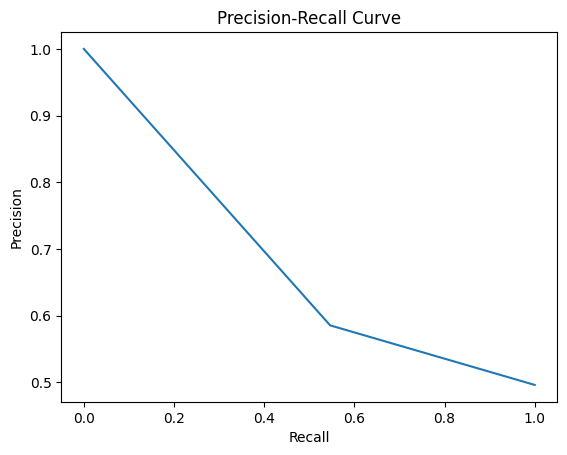

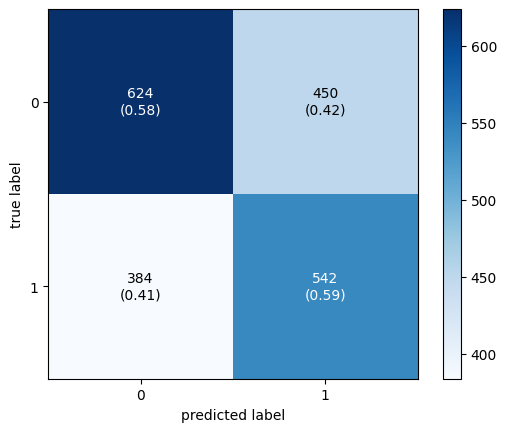

############################################################################




SupportVectorMachine

Train score of trained model: 90.1875
Test score of trained model: 63.7
 
Accuracy : 0.637
Precision: 0.6542338709677419
Recall   : 0.6288759689922481
F1 score : 0.6413043478260869
Specificity : 0.6456611570247934

Classification Report: 
              precision    recall  f1-score   support

           0       0.62      0.65      0.63       968
           1       0.65      0.63      0.64      1032

    accuracy                           0.64      2000
   macro avg       0.64      0.64      0.64      2000
weighted avg       0.64      0.64      0.64      2000





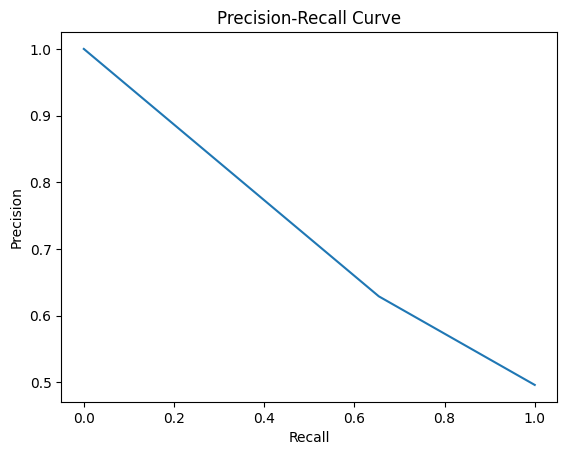

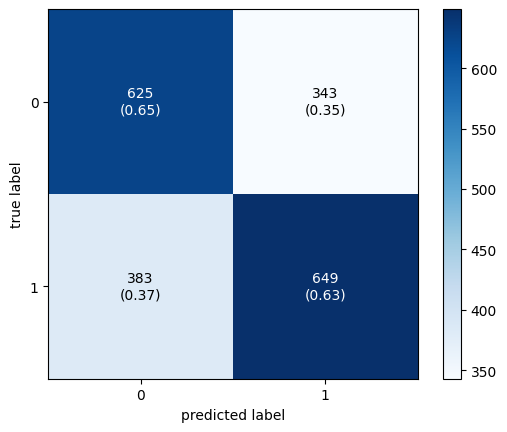

############################################################################




DecisionTreeClassifier

Train score of trained model: 100.0
Test score of trained model: 53.900000000000006
 
Accuracy : 0.539
Precision: 0.5574596774193549
Recall   : 0.5337837837837838
F1 score : 0.5453648915187377
Specificity : 0.5446058091286307

Classification Report: 
              precision    recall  f1-score   support

           0       0.52      0.54      0.53       964
           1       0.56      0.53      0.55      1036

    accuracy                           0.54      2000
   macro avg       0.54      0.54      0.54      2000
weighted avg       0.54      0.54      0.54      2000





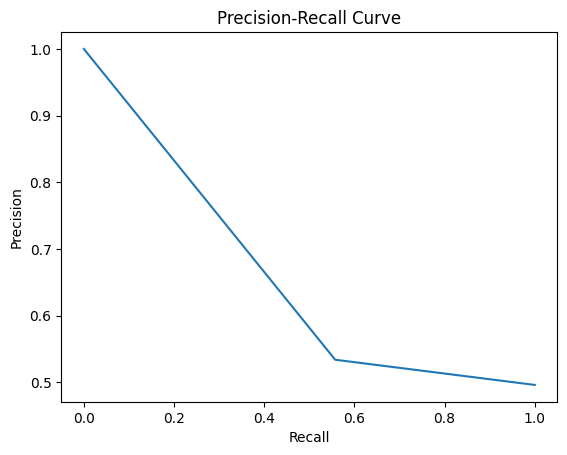

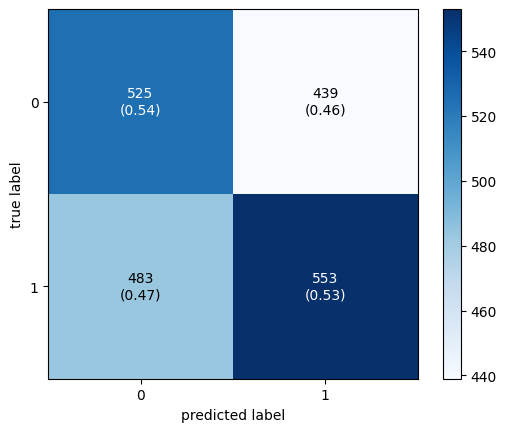

############################################################################




KNeighborsClassifier

Train score of trained model: 69.675
Test score of trained model: 55.95
 
Accuracy : 0.5595
Precision: 0.7913306451612904
Recall   : 0.5380397532556546
F1 score : 0.6405548755609956
Specificity : 0.6173752310536045

Classification Report: 
              precision    recall  f1-score   support

           0       0.33      0.62      0.43       541
           1       0.79      0.54      0.64      1459

    accuracy                           0.56      2000
   macro avg       0.56      0.58      0.54      2000
weighted avg       0.67      0.56      0.58      2000





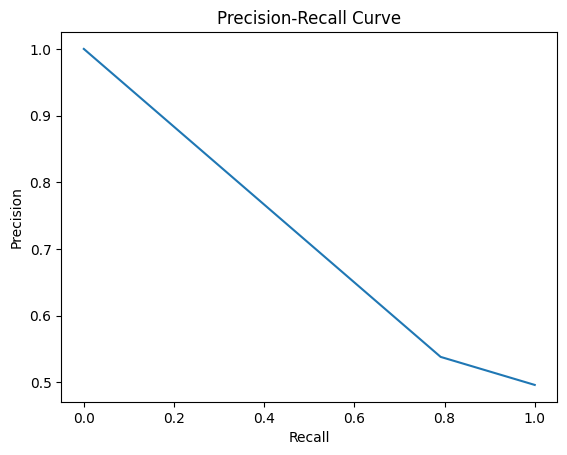

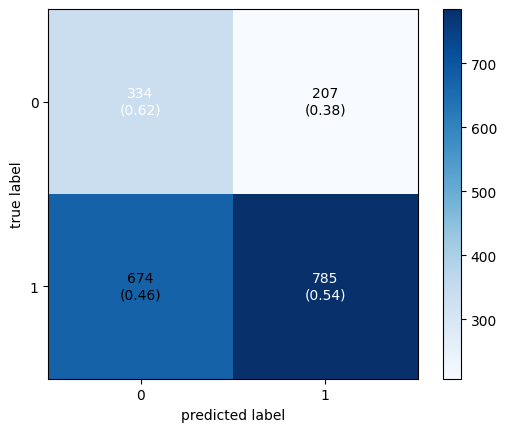

############################################################################




GradientBoostingClassifier

Train score of trained model: 82.95
Test score of trained model: 61.0
 
Accuracy : 0.61
Precision: 0.6270161290322581
Recall   : 0.6027131782945736
F1 score : 0.6146245059288538
Specificity : 0.6177685950413223

Classification Report: 
              precision    recall  f1-score   support

           0       0.59      0.62      0.61       968
           1       0.63      0.60      0.61      1032

    accuracy                           0.61      2000
   macro avg       0.61      0.61      0.61      2000
weighted avg       0.61      0.61      0.61      2000





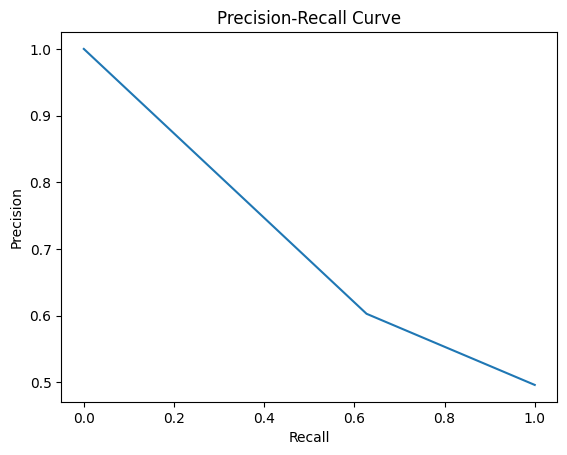

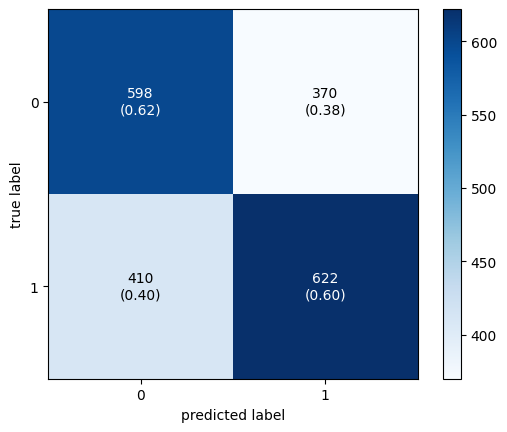

############################################################################




AdaBoostClassifier

Train score of trained model: 66.16250000000001
Test score of trained model: 58.5
 
Accuracy : 0.585
Precision: 0.5967741935483871
Recall   : 0.5792563600782779
F1 score : 0.5878848063555114
Specificity : 0.591002044989775

Classification Report: 
              precision    recall  f1-score   support

           0       0.57      0.59      0.58       978
           1       0.60      0.58      0.59      1022

    accuracy                           0.58      2000
   macro avg       0.59      0.59      0.58      2000
weighted avg       0.59      0.58      0.59      2000





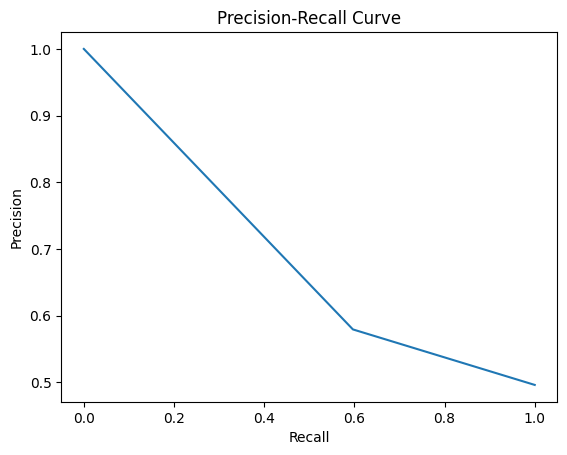

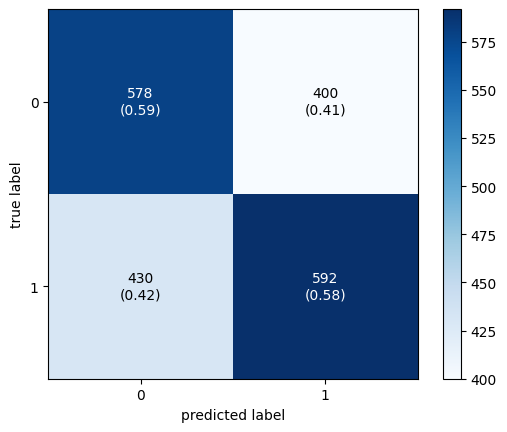

############################################################################




BaggingClassifier

Train score of trained model: 98.7375
Test score of trained model: 56.35
 
Accuracy : 0.5635
Precision: 0.47076612903225806
Recall   : 0.5730061349693252
F1 score : 0.5168788046485888
Specificity : 0.5569620253164557

Classification Report: 
              precision    recall  f1-score   support

           0       0.65      0.56      0.60      1185
           1       0.47      0.57      0.52       815

    accuracy                           0.56      2000
   macro avg       0.56      0.56      0.56      2000
weighted avg       0.58      0.56      0.57      2000





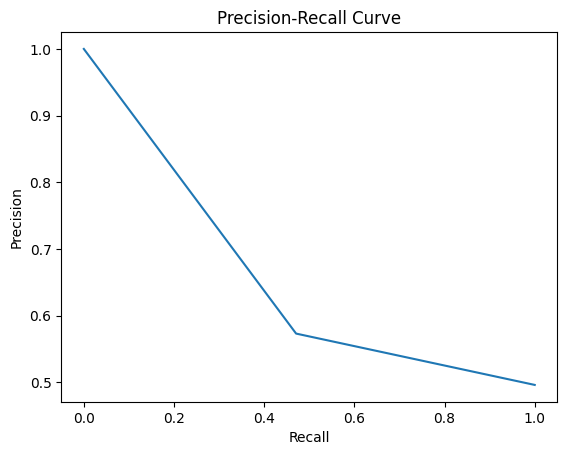

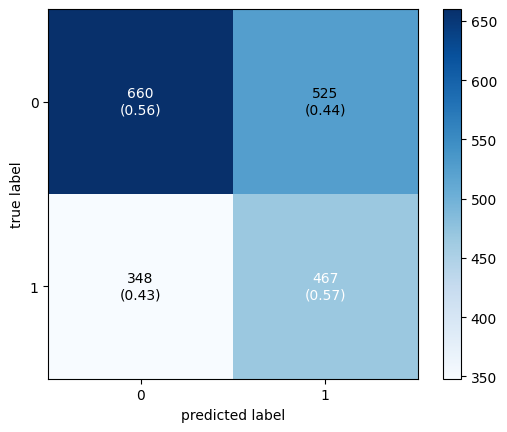

############################################################################




ExtraTreesClassifier

Train score of trained model: 100.0
Test score of trained model: 58.550000000000004
 
Accuracy : 0.5855
Precision: 0.5675403225806451
Recall   : 0.5846313603322949
F1 score : 0.5759590792838875
Specificity : 0.5863066538090647

Classification Report: 
              precision    recall  f1-score   support

           0       0.60      0.59      0.59      1037
           1       0.57      0.58      0.58       963

    accuracy                           0.59      2000
   macro avg       0.59      0.59      0.59      2000
weighted avg       0.59      0.59      0.59      2000





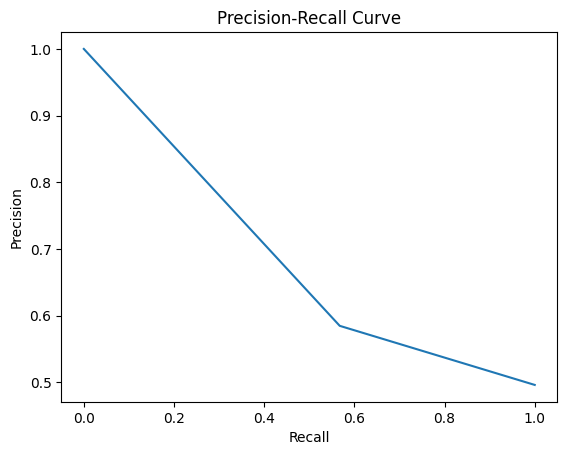

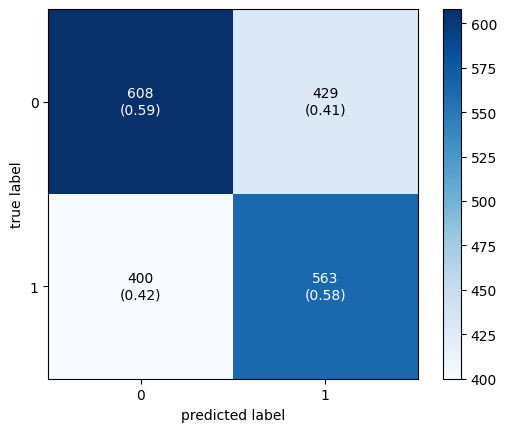

############################################################################




XGBClassifier

Train score of trained model: 84.48750000000001
Test score of trained model: 57.099999999999994
 
Accuracy : 0.571
Precision: 0.5826612903225806
Recall   : 0.5655577299412916
F1 score : 0.5739821251241312
Specificity : 0.5766871165644172

Classification Report: 
              precision    recall  f1-score   support

           0       0.56      0.58      0.57       978
           1       0.58      0.57      0.57      1022

    accuracy                           0.57      2000
   macro avg       0.57      0.57      0.57      2000
weighted avg       0.57      0.57      0.57      2000





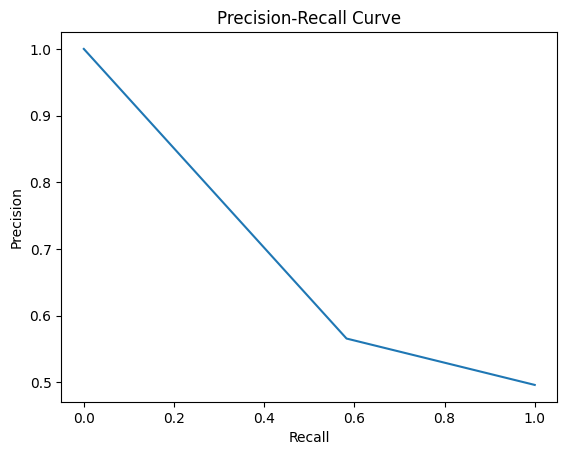

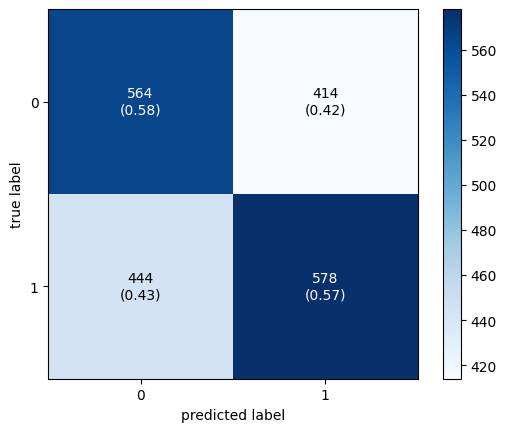

############################################################################




Stochastic Gradient Descent

Train score of trained model: 76.825
Test score of trained model: 57.9
 
Accuracy : 0.579
Precision: 0.5040322580645161
Recall   : 0.5882352941176471
F1 score : 0.5428881650380022
Specificity : 0.5721739130434783

Classification Report: 
              precision    recall  f1-score   support

           0       0.65      0.57      0.61      1150
           1       0.50      0.59      0.54       850

    accuracy                           0.58      2000
   macro avg       0.58      0.58      0.58      2000
weighted avg       0.59      0.58      0.58      2000





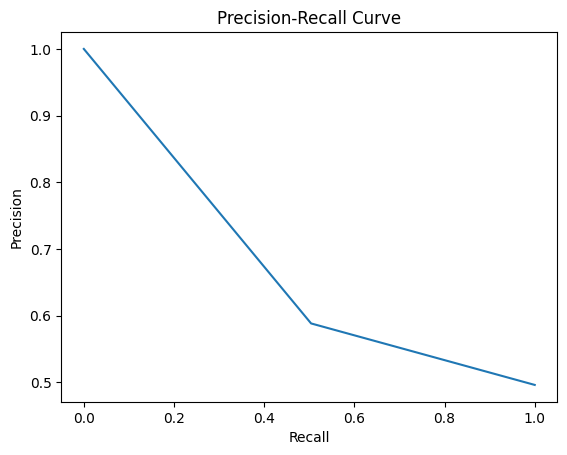

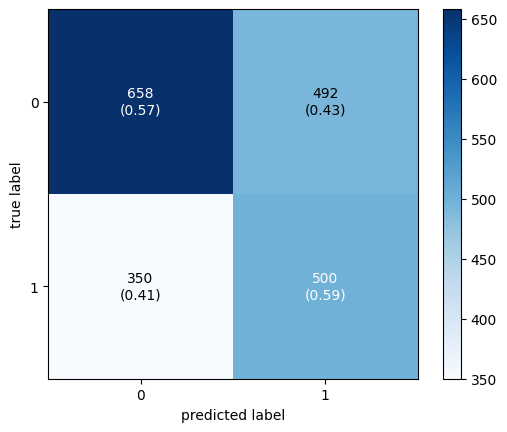

############################################################################




Neural Nets

Train score of trained model: 82.0
Test score of trained model: 62.6
 
Accuracy : 0.626
Precision: 0.7620967741935484
Recall   : 0.5962145110410094
F1 score : 0.6690265486725664
Specificity : 0.6775956284153005

Classification Report: 
              precision    recall  f1-score   support

           0       0.49      0.68      0.57       732
           1       0.76      0.60      0.67      1268

    accuracy                           0.63      2000
   macro avg       0.63      0.64      0.62      2000
weighted avg       0.66      0.63      0.63      2000





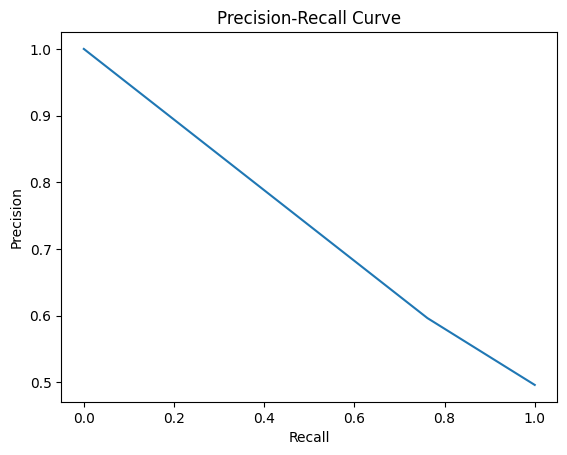

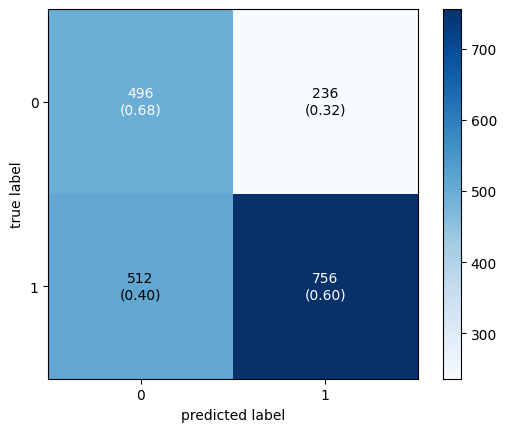

############################################################################





In [31]:
models = {
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'LinearDiscriminantAnalysis':LinearDiscriminantAnalysis(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SupportVectorMachine': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'XGBClassifier': XGBClassifier(learning_rate= 1, max_depth= 5, n_estimators= 10),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
    'Neural Nets': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1),
}

modelNames = ["GaussianNB", 'BernoulliNB', 'LinearDiscriminantAnalysis','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier', 'AdaBoostClassifier', 'BaggingClassifier','XGBClassifier',
              'ExtraTreesClassifier',
             'Stochastic Gradient Descent', 'Neural Nets']

trainScores = []
validationScores = []
testScores = []

for m in models:
    model = models[m]
    model.fit(X_train, y_train)
#     score = model.score(X_valid, y_valid)

    print(f'\n{m}\n') 
    train_score = model.score(X_train, y_train)
    print(f'Train score of trained model: {train_score*100}')
    trainScores.append(train_score*100)

#     validation_score = model.score(X_valid, y_valid)
#     print(f'Validation score of trained model: {validation_score*100}')
#     validationScores.append(validation_score*100)

    test_score = model.score(X_test, y_test)
    print(f'Test score of trained model: {test_score*100}')
    testScores.append(test_score*100)
    print(" ")

    y_predictions = model.predict(X_test)
    cm = confusion_matrix(y_predictions, y_test)

    tn = cm[0,0]
    fp = cm[0,1]
    tp = cm[1,1]
    fn = cm[1,0]
    accuracy  = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp)
    recall    = tp / (tp + fn)
    f1score  = 2 * precision * recall / (precision + recall)
    specificity = tn / (tn + fp)
    print(f'Accuracy : {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall   : {recall}')
    print(f'F1 score : {f1score}')
    print(f'Specificity : {specificity}')
    print("") 
    print(f'Classification Report: \n{classification_report(y_predictions, y_test)}\n')
    print("")
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_predictions)
    plt.plot(recall, precision)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    
    # Plot non-normalized confusion matrix
    fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
    plt.show()

    for m in range (1):
        current = modelNames[m]
        modelNames.remove(modelNames[m])

    preds = model.predict(X_test)
    confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
    print("############################################################################")
    print("")
    print("")
    print("")

In [32]:


modelNames = ["GaussianNB", 'BernoulliNB', 'LinearDiscriminantAnalysis','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier', 'AdaBoostClassifier', 'BaggingClassifier','XGBClassifier',
              'ExtraTreesClassifier',
             'Stochastic Gradient Descent', 'Neural Nets']

for i in range(len(modelNames)):
    print(f'Accuracy of {modelNames[i]} -----> {testScores[i]}')
     
import pandas as pd
data = {'Model': modelNames, 'Accuracy': testScores}  
result = pd.DataFrame(data)
result


Accuracy of GaussianNB -----> 60.050000000000004
Accuracy of BernoulliNB -----> 57.45
Accuracy of LinearDiscriminantAnalysis -----> 60.0
Accuracy of LogisticRegression -----> 60.099999999999994
Accuracy of RandomForestClassifier -----> 58.3
Accuracy of SupportVectorMachine -----> 63.7
Accuracy of DecisionTreeClassifier -----> 53.900000000000006
Accuracy of KNeighborsClassifier -----> 55.95
Accuracy of GradientBoostingClassifier -----> 61.0
Accuracy of AdaBoostClassifier -----> 58.5
Accuracy of BaggingClassifier -----> 56.35
Accuracy of XGBClassifier -----> 58.550000000000004
Accuracy of ExtraTreesClassifier -----> 57.099999999999994
Accuracy of Stochastic Gradient Descent -----> 57.9
Accuracy of Neural Nets -----> 62.6


,Model,Accuracy
0,GaussianNB,60.05
1,BernoulliNB,57.45
2,LinearDiscriminantAnalysis,60.00
3,LogisticRegression,60.10
4,RandomForestClassifier,58.30
5,SupportVectorMachine,63.70
6,DecisionTreeClassifier,53.90
7,KNeighborsClassifier,55.95
8,GradientBoostingClassifier,61.00
9,AdaBoostClassifier,58.50


In [33]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], round(y[i], 3), ha = 'center',
                 bbox = dict(facecolor = 'gold', alpha =.9), weight='bold')

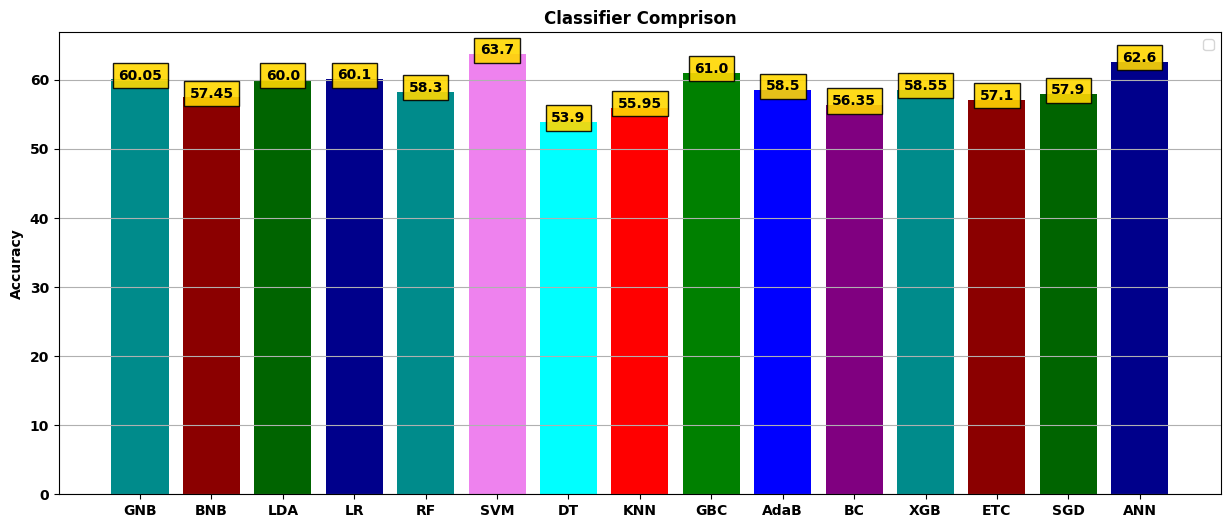

In [34]:
Names = ["GNB", 'BNB', 'LDA','LR','RF','SVM',
             'DT', 'KNN','GBC', 'AdaB', 'BC','XGB',
              'ETC', 'SGD', 'ANN']
fig = plt.figure(figsize=(15,6))
plt.title("Classifier Comprison",fontweight='bold')
plt.ylabel("Accuracy", fontweight="bold")
plt.xticks(weight="bold")
plt.yticks(weight="bold")
plt.bar(Names, testScores, color=['darkcyan', 'darkred', 'darkgreen', 'darkblue', 'darkcyan', 'violet', 'cyan', 'red', 'green', 'blue', 'purple'])

plt.grid(axis='y')
addlabels(Names, testScores)
plt.legend()

### Select Best Model and Save

In [35]:
best_model = result.Model.iloc[np.argmax(result.Accuracy)]
print(f'Best model is: {best_model}')
model = models[best_model]
model.fit(X_train, y_train)

Best model is: SupportVectorMachine


SVC()

In [36]:
import pickle

filename = "/content/drive/MyDrive/Model_Image/sift_model.pickle"

# save model
# pickle.dump(model, open(filename, "wb"))

# load model
loaded_model = pickle.load(open(filename, "rb"))


Female


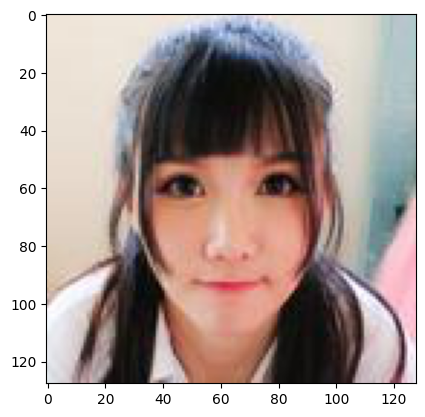

In [37]:
test_path = '5.jpg'
from PIL import Image

image = Image.open(test_path)
plt.imshow(image, cmap='gray')

# Resize image
image = image.resize((128, 128))
# Extract the SIFT descriptor
descriptor_extractor = SIFT()

# Extract the SIFT descriptor from the image
descriptor_extractor.detect_and_extract(image.convert('L'))
image_keypoints   = descriptor_extractor.keypoints
image_descriptors = descriptor_extractor.descriptors
feature = np.array(image_descriptors[:20, :]).flatten().reshape(1,-1)

y_pred = loaded_model.predict(feature)
if y_pred==1:
  print('Male')
else:
  print('Female')